In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import os
## print(os.listdir("../input"))
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import pickle 
import seaborn as sns 

### Load Data from Pickle File - Importing form pickle file

In [155]:
df_linearReg = pd.read_pickle('my_df.pickle')
print(df_linearReg.shape)

(713717, 23)


In [156]:
print(df_linearReg.columns)

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation', 'Guaranteed Compensations'],
      dtype='object')


In [157]:
type(df_linearReg)

pandas.core.frame.DataFrame

In [158]:
df_linearReg.corr()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Guaranteed Compensations
Year,1.000000,0.272428,0.000267,0.820786,0.021324,0.047006,-0.063583,0.021030,-0.015807,0.135772,0.044373,0.125144,0.049914,0.053241
Organization Group Code,0.272428,1.000000,-0.016097,0.337910,-0.182923,-0.199745,-0.192342,-0.226231,-0.208970,-0.086495,-0.018694,-0.103981,-0.198763,-0.162984
Union Code,0.000267,-0.016097,1.000000,-0.000050,-0.074664,0.056852,0.150896,-0.032227,-0.089034,-0.065639,-0.280619,-0.132510,-0.060356,-0.093814
Employee Identifier,0.820786,0.337910,-0.000050,1.000000,0.032070,0.049268,-0.057906,0.031463,0.008650,0.209840,0.043867,0.158409,0.066831,0.071043
Salaries,0.021324,-0.182923,-0.074664,0.032070,1.000000,0.263628,0.350111,0.960856,0.948719,0.595185,0.721336,0.899072,0.968723,0.991165
Overtime,0.047006,-0.199745,0.056852,0.049268,0.263628,1.000000,0.356168,0.497833,0.310390,0.260118,0.078670,0.294249,0.455202,0.278637
Other Salaries,-0.063583,-0.192342,0.150896,-0.057906,0.350111,0.356168,1.000000,0.505904,0.376403,0.177665,0.080782,0.284654,0.458670,0.337892
Total Salary,0.021030,-0.226231,-0.032227,0.031463,0.960856,0.497833,0.505904,1.000000,0.930811,0.591519,0.646309,0.873130,0.991155,0.955169
Retirement,-0.015807,-0.208970,-0.089034,0.008650,0.948719,0.310390,0.376403,0.930811,1.000000,0.618693,0.672923,0.923645,0.952776,0.961749
Health and Dental,0.135772,-0.086495,-0.065639,0.209840,0.595185,0.260118,0.177665,0.591519,0.618693,1.000000,0.422480,0.783721,0.659041,0.665245


## Based on the above correlation, we're picking 'Health and Dental','Other Benefits' & 'Salary' as x-axis
# and will predict the 'Total Compensation'

In [159]:
print(df_linearReg.info()) # checking to see the dataset so that any type conversions can be done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713717 entries, 0 to 835306
Data columns (total 23 columns):
Year Type                   713717 non-null object
Year                        713717 non-null int64
Organization Group Code     713717 non-null int64
Organization Group          713717 non-null object
Department Code             686417 non-null object
Department                  429330 non-null object
Union Code                  713156 non-null float64
Union                       713156 non-null object
Job Family Code             713717 non-null object
Job Family                  713717 non-null object
Job Code                    713717 non-null object
Job                         713717 non-null object
Employee Identifier         713717 non-null int64
Salaries                    713717 non-null float64
Overtime                    713717 non-null float64
Other Salaries              713717 non-null float64
Total Salary                713717 non-null float64
Retirement          

### Data Cleanup 

## Cleaning Nulls in the dataset

In [160]:
df_linearReg.isnull().sum()


Year Type                        0
Year                             0
Organization Group Code          0
Organization Group               0
Department Code              27300
Department                  284387
Union Code                     561
Union                          561
Job Family Code                  0
Job Family                       0
Job Code                         0
Job                              0
Employee Identifier              0
Salaries                         0
Overtime                         0
Other Salaries                   0
Total Salary                     0
Retirement                       0
Health and Dental                0
Other Benefits                   0
Total Benefits                   0
Total Compensation               0
Guaranteed Compensations         0
dtype: int64

## Drop all records whose Department code is NULL and Union Code is NULL

In [161]:
df_linearReg.dropna(subset=['Department'], how='all', inplace=True)
df_linearReg.dropna(subset=['Union Code'], how='all', inplace=True)
df_linearReg.isnull().sum()

Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                  0
Union                       0
Job Family Code             0
Job Family                  0
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Benefits              0
Total Compensation          0
Guaranteed Compensations    0
dtype: int64

## Multi LinearRegression to predict the Total Compensation using Salaries, Health and Dental and Other Benefits. Two of them have ~65% corelation while Salaries had 96% corelation

In [162]:
df_xaxis = df_linearReg['Salaries'] # x-axis
df_x1axis = df_linearReg['Health and Dental']
df_x2axis = df_linearReg['Other Benefits']
# Assigning 

In [163]:
df_xaxis.head()

300572    323901.54
300574     41429.63
300575     60354.03
300579     45472.00
300580     48035.03
Name: Salaries, dtype: float64

In [164]:
df_yaxis = df_linearReg['Total Compensation'] # y-axis
df_yaxis.head()


300572    430227.43
300574     75680.27
300575     84258.79
300579     77525.56
300580     89057.52
Name: Total Compensation, dtype: float64

In [165]:
#Checking the average values of Total Compensation Columns - We see below that the Average is somewhere around

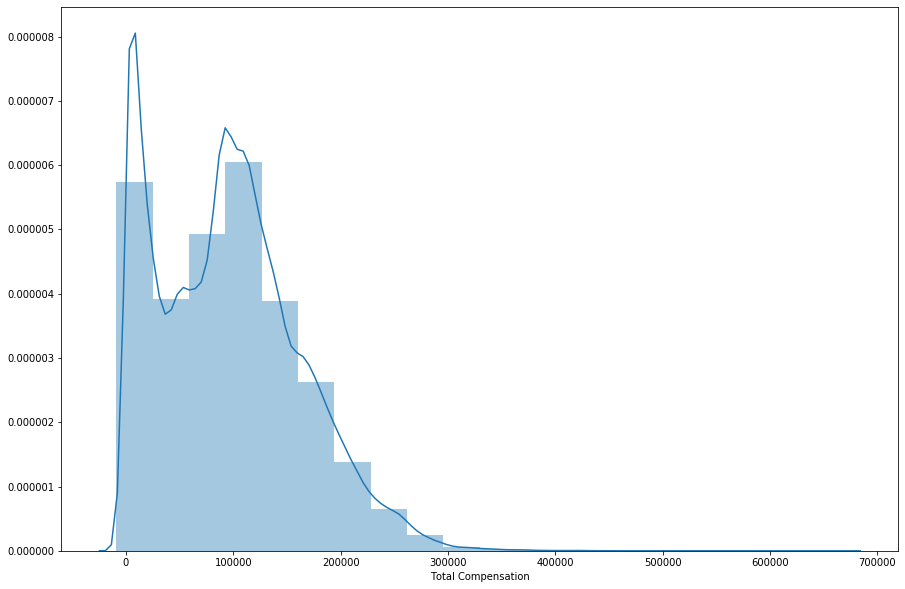

In [166]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_linearReg['Total Compensation'], bins = 20)

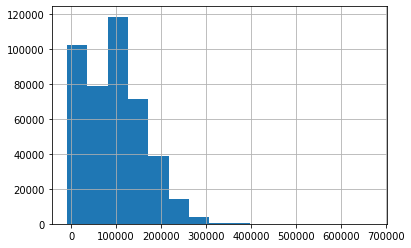

In [167]:
df_linearReg['Total Compensation'].hist(bins=15)

In [168]:
# Normalizing values by dividing the x  and y co-rodinates by 1000,000

In [169]:
df_xaxis = df_xaxis.apply(lambda x:x/100000)
df_x1axis = df_x1axis.apply(lambda x:x/100000)
df_x2axis = df_x2axis.apply(lambda x:x/100000)
df_yaxis = df_yaxis.apply(lambda x:x/100000)

In [170]:
x = np.array([df_xaxis, df_x1axis, df_x2axis]).T

y = np.array([df_yaxis]).T

In [171]:
reg_eidentifier = linear_model.LinearRegression()
print(reg_eidentifier)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=42)

In [173]:
reg_eidentifier.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
print(reg_eidentifier.coef_) # co-effecient/slope
print(reg_eidentifier.intercept_)  # constant value/Y-Intercept
print(reg_eidentifier.score(x_train, y_train)) 
print(reg_eidentifier.score(x_test, y_test))

[[ 1.34940543  1.91321068 -0.58442695]]
[-0.02209658]
0.9538962761393598
0.9548621362298281


In [175]:
y_pred_compensation = reg_eidentifier.predict(x_test)


## Creating a data frame with two columns to show the Actual vs the Predicted values

In [176]:
df_graph = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred_compensation.flatten()})
print(df_graph)

         Actual  Predicted
0      1.039961   0.928117
1      1.831466   1.923939
2      1.193484   1.075463
3      1.408170   1.387170
4      0.473508   0.515319
...         ...        ...
85749  0.154004   0.190057
85750  1.031555   0.814901
85751  0.045936   0.028842
85752  1.663983   1.813181
85753  1.739922   1.712103

[85754 rows x 2 columns]


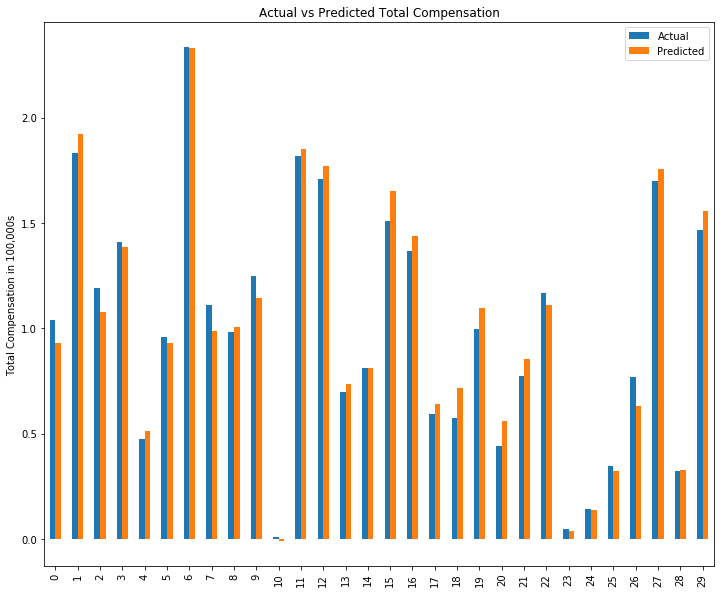

In [183]:
df_graph_new = df_graph.head(30)
df_graph_new.head()
df_graph_new.plot(kind='bar',figsize=(12,10))
plt.title("Actual vs Predicted Total Compensation")
plt.ylabel("Total Compensation in 100,000s")
plt.show()



## Calculate Mean Squared Error


In [184]:
mse = np.mean((y_pred_compensation-y_test)**2)
print(mse)

0.019874367340531336


In [185]:
from sklearn.metrics import r2_score
r2_score(y_pred_compensation,y_test)
# another way to capture r**2 error

0.9526888307902542